# Naked singularity in Vaidya collapse

This Jupyter/SageMath notebook is relative to the lectures
[Geometry and physics of black holes](https://luth.obspm.fr/~luthier/gourgoulhon/bh16/).

The computations make use of tools developed through the [SageManifolds project](https://sagemanifolds.obspm.fr).

In [1]:
version()

'SageMath version 9.7.beta1, Release Date: 2022-05-26'

In [2]:
%display latex

In [3]:
M = Manifold(4, 'M', structure='Lorentzian')
print(M)

4-dimensional Lorentzian manifold M


In [4]:
XN.<v,r,th,ph> = M.chart(r'v:(0,+oo) r:(0,+oo) th:(0,pi):\theta ph:(0,2*pi):\varphi:periodic')
XN

Chart (M, (v, r, th, ph))

### The two roots $(x_1, x_2)$ of the polynomial $\alpha x^2 - x +2$ for $0<\alpha<\frac{1}{8}$

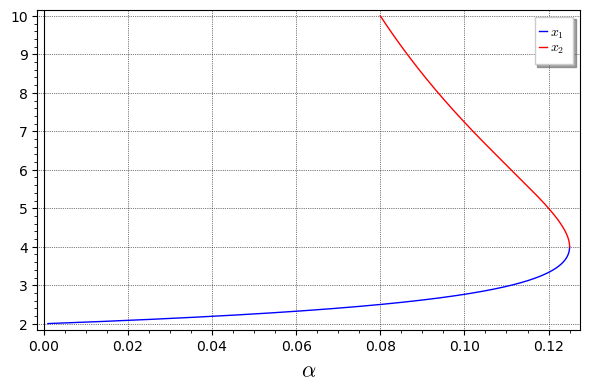

In [5]:
graph = plot((1 - sqrt(1 - 8*x))/(2*x), (x, 0.001, 1/8), color='blue', 
             legend_label=r'$x_1$', axes_labels=[r'$\alpha$', ''])
graph += plot((1 + sqrt(1 - 8*x))/(2*x), (x, 0.08, 1/8), color='red', 
              legend_label=r'$x_2$')
graph.show(frame=True, gridlines=True)

In [6]:
x1 = var('x1', latex_name=r'x_1', domain='real')
assume(x1 > 2, x1 < 4)
x2 = var('x2', latex_name=r'x_2', domain='real')
assume(x2 > 4)

In [7]:
alpha = 2/(x1*x2)
alpha

2/(x1*x2)

### Vaidya metric in terms of the $(v, r, \theta,\varphi)$ coordinates

In [8]:
g = M.metric()
g[0,0] = -(1 - alpha*v/r)
g[0,1] = 1
g[2,2] = r^2
g[3,3] = (r*sin(th))^2
g.display()

g = (2*v/(r*x1*x2) - 1) dv⊗dv + dv⊗dr + dr⊗dv + r^2 dth⊗dth + r^2*sin(th)^2 dph⊗dph

## Double null-coordinate system in the region $r > v / x_2$

In [9]:
N1 = M.open_subset('N1', latex_name=r'N_1',
                   coord_def={XN: r > v/x2})

In [10]:
X1.<u,v,th,ph> = N1.chart(r'u v:(0,+oo) th:(0,pi):\theta ph:(0,2*pi):\varphi:periodic')
X1

Chart (N1, (u, v, th, ph))

In [11]:
assume(x2*r - v > 0)

In [12]:
XN_to_X1 = XN.transition_map(X1, ((v/x1 - r)/((r - v/x2))^(x1/x2),
                                  v, th, ph))
XN_to_X1.display()

u = -(r - v/x1)/(r - v/x2)^(x1/x2)
v = v
th = th
ph = ph

In [13]:
g.display_comp(X1.frame(), chart=XN.restrict(N1))

g_u,v = (r*x2 - v)^(x1/x2 + 1)/((r*x1 - r*x2)*x2^(x1/x2)) 
g_v,u = (r*x2 - v)^(x1/x2 + 1)/((r*x1 - r*x2)*x2^(x1/x2)) 
g_v,v = -((x1 - 2)*x2 - 2*x1)/(x1*x2) 
g_th,th = r^2 
g_ph,ph = r^2*sin(th)^2

In [14]:
g[X1.frame(),0,1].expr()

(r*x2 - v)^(x1/x2 + 1)/((r*x1 - r*x2)*x2^(x1/x2))

To simplify the components of $g$, let us substitute $x_2$ by its expression
in terms of $x_1$, i.e. $x_2 = \frac{2 x_1}{x_1 - 2}$:

In [15]:
xx2 = 2*x1/(x1 - 2)
g.apply_map(lambda x: x.subs({x2: xx2}).simplify_full(),
            frame=X1.frame(), chart=XN.restrict(N1),
            keep_other_components=True)

g.display_comp(X1.frame(), chart=XN.restrict(N1))

g_u,v = 2*(((2*r - v)*x1 + 2*v)/(x1 - 2))^(1/2*x1)/((r*x1 - 4*r)*(2*x1/(x1 - 2))^(1/2*x1)) 
g_v,u = 2*(((2*r - v)*x1 + 2*v)/(x1 - 2))^(1/2*x1)/((r*x1 - 4*r)*(2*x1/(x1 - 2))^(1/2*x1)) 
g_th,th = r^2 
g_ph,ph = r^2*sin(th)^2

We note that $g_{uu} = 0$ and $g_{vv} = 0$, which proves that $(u,v,\theta,\varphi)$ is a **double-null coordinate system** on $N_1$.

Alternative form of $g_{uv}$:

In [16]:
guv = g[X1.frame(),0,1].expr()
guv

2*(((2*r - v)*x1 + 2*v)/(x1 - 2))^(1/2*x1)/((r*x1 - 4*r)*(2*x1/(x1 - 2))^(1/2*x1))

In [17]:
guv_alt = - x2/(x2 - x1)/r*(r - v/x2)^(x1/2)
guv_alt

(r - v/x2)^(1/2*x1)*x2/(r*(x1 - x2))

Test:

In [18]:
s = guv - guv_alt.subs({x2: xx2})
s.simplify_full().canonicalize_radical()

0

### Special case $\alpha = 1/9$

In [19]:
u_vr = XN_to_X1(v, r, th, ph)[0]
u_vr

-(r*x1 - v)*x2^(x1/x2)/((r*x2 - v)^(x1/x2)*x1)

In [20]:
u_vr1 = u_vr.subs({x1: 3, x2: 6})
u_vr1

-1/3*sqrt(6)*(3*r - v)/sqrt(6*r - v)

In [21]:
u_vr1^2

2/3*(3*r - v)^2/(6*r - v)

Solving for $r$ in terms of $(u,v)$:

In [22]:
eq = u^2 == u_vr1^2
eq

u^2 == 2/3*(3*r - v)^2/(6*r - v)

In [23]:
solve(eq, r)

[r == 1/2*u^2 - 1/6*sqrt(9*u^2 + 6*v)*u + 1/3*v, r == 1/2*u^2 + 1/6*sqrt(9*u^2 + 6*v)*u + 1/3*v]

In [24]:
ruv = solve(eq, r)[0].rhs()
ruv

1/2*u^2 - 1/6*sqrt(9*u^2 + 6*v)*u + 1/3*v

Recovering Fig. 3a of B. Waugh and K. Lake, [Phys. Rev. D **34**, 2978 (1986)](https://doi.org/10.1103/PhysRevD.34.2978):

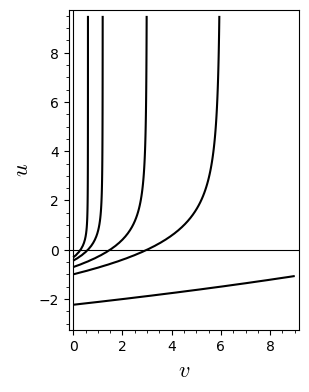

In [25]:
contour_plot(ruv, (v, 0, 9), (u, -3, 9.5), cmap=['black'],
             contours=(0.1, 0.2, 0.5, 1., 5), fill=False, 
             axes_labels=(r'$v$', r'$u$'), axes=True)

## Double null-coordinate system in the region $r < v / x_1$

In [26]:
N2 = M.open_subset('N2', latex_name=r'N_2',
                   coord_def={XN: r < v/x1})

In [27]:
X2.<u,v,th,ph> = N2.chart(r'u v:(0,+oo) th:(0,pi):\theta ph:(0,2*pi):\varphi:periodic')
X2

Chart (N2, (u, v, th, ph))

In [28]:
assume(v - x1*r > 0)

In [29]:
XN_to_X2 = XN.transition_map(X2, ((v/x2 - r)/((v/x1 - r))^(x2/x1),
                                  v, th, ph))
XN_to_X2.display()

u = -(r - v/x2)/(-r + v/x1)^(x2/x1)
v = v
th = th
ph = ph

In [30]:
g.display_comp(X2.frame(), chart=XN.restrict(N2))

g_u,v = (r*x1 - v)*(-r*x1 + v)^(x2/x1)/(r*x1^(x2/x1)*x2 - r*x1^(x2/x1 + 1)) 
g_v,u = (r*x1 - v)*(-r*x1 + v)^(x2/x1)/(r*x1^(x2/x1)*x2 - r*x1^(x2/x1 + 1)) 
g_v,v = -((x1 - 2)*x2 - 2*x1)/(x1*x2) 
g_th,th = r^2 
g_ph,ph = r^2*sin(th)^2

In [31]:
g[X2.frame(),0,1].expr()

(r*x1 - v)*(-r*x1 + v)^(x2/x1)/(r*x1^(x2/x1)*x2 - r*x1^(x2/x1 + 1))

To simplify the components of $g$, let us substitute $x_1$ by its expression
in terms of $x_2$, i.e. $x_1 = \frac{2 x_2}{x_2 - 2}$:

In [32]:
xx1 = 2*x2/(x2 - 2)
g.apply_map(lambda x: x.subs({x1: xx1}).simplify_full(),
            frame=X2.frame(), chart=XN.restrict(N2),
            keep_other_components=True)

g.display_comp(X2.frame(), chart=XN.restrict(N2))

g_u,v = -2*(-((2*r - v)*x2 + 2*v)/(x2 - 2))^(1/2*x2)/((r*x2 - 4*r)*(2*x2/(x2 - 2))^(1/2*x2)) 
g_v,u = -2*(-((2*r - v)*x2 + 2*v)/(x2 - 2))^(1/2*x2)/((r*x2 - 4*r)*(2*x2/(x2 - 2))^(1/2*x2)) 
g_th,th = r^2 
g_ph,ph = r^2*sin(th)^2

We note that $g_{uu} = 0$ and $g_{vv} = 0$, which proves that $(u,v,\theta,\varphi)$ is a **double-null coordinate system** on $N_2$.

Alternative form of $g_{uv}$:

In [33]:
guv = g[X2.frame(),0,1].expr()
guv

-2*(-((2*r - v)*x2 + 2*v)/(x2 - 2))^(1/2*x2)/((r*x2 - 4*r)*(2*x2/(x2 - 2))^(1/2*x2))

In [34]:
guv_alt = - x1/(x2 - x1)/r*(v/x1 - r)^(x2/2)
guv_alt

(-r + v/x1)^(1/2*x2)*x1/(r*(x1 - x2))

Test:

In [35]:
s = guv - guv_alt.subs({x1: xx1})
s.simplify_full().canonicalize_radical()

0

## Special case $\alpha = 1/9$

In [36]:
u_vr = XN_to_X2(v, r, th, ph)[0]
u_vr

-(r*x1^(x2/x1)*x2 - v*x1^(x2/x1))/((-r*x1 + v)^(x2/x1)*x2)

In [37]:
u_vr1 = u_vr.subs({x1: 3, x2: 6})
u_vr1

-3/2*(6*r - v)/(3*r - v)^2

Solving for $r$ in terms of $(u,v)$:

In [38]:
eq = u == u_vr1
solve(eq, r)

[r == 1/6*(2*u*v - sqrt(-6*u*v + 9) - 3)/u, r == 1/6*(2*u*v + sqrt(-6*u*v + 9) - 3)/u]

In [39]:
ruv = solve(eq, r)[1].rhs()
ruv

1/6*(2*u*v + sqrt(-6*u*v + 9) - 3)/u

Recovering Fig. 3b of B. Waugh and K. Lake, [Phys. Rev. D **34**, 2978 (1986)](https://doi.org/10.1103/PhysRevD.34.2978):

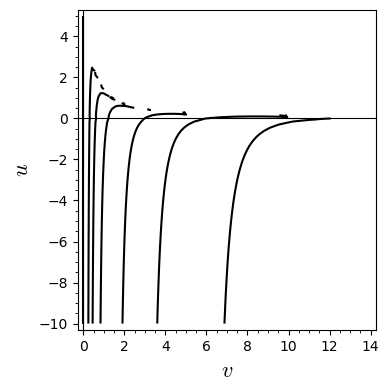

In [40]:
contour_plot(ruv, (v, 0, 14), (u, -10, 5), cmap=['black'],
             contours=(0, 0.05, 0.1, 0.2, 0.5, 1., 2.), fill=False, 
             axes_labels=(r'$v$', r'$u$'), axes=True)